In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 Sales Data Analysis Project")
print("=" * 50)
print("Skills Demonstrated: SQLite3, SQL, Pandas, Data Visualization")
print("Goal: Extract business insights from sales data")
print("=" * 50)

📊 Sales Data Analysis Project
Skills Demonstrated: SQLite3, SQL, Pandas, Data Visualization
Goal: Extract business insights from sales data


In [ ]:
# ==========================================
# STEP 1: LOAD CSV DATA AND EXPLORE
# ==========================================

print("\n🔍 STEP 1: Loading and Exploring Raw Data")
print("-" * 40)

# --- Upload CSV file from local machine ---
from google.colab import files
import pandas as pd
import io

print("⬆️ Please select the CSV file from your local system")
uploaded = files.upload()  # This will open a file chooser dialog

# Get the uploaded filename
filename = list(uploaded.keys())[0]

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"✅ Loaded CSV file '{filename}' with {len(df)} records")
print(f"📋 Dataset shape: {df.shape}")

# Check if 'order_date' exists before showing date range
if 'order_date' in df.columns:
    print(f"📅 Date range: {df['order_date'].min()} to {df['order_date'].max()}")

# Display basic info
print("\n📊 Dataset Overview:")
df.info()

print("\n📈 First 5 rows:")
display(df.head())

print("\n📉 Statistical Summary:")
display(df.describe())

# Check for missing values
print(f"\n❓ Total missing values: {df.isnull().sum().sum()}")


🔍 STEP 1: Loading and Exploring Raw Data
----------------------------------------
⬆️ Please select the CSV file from your local system


Saving sales_data.csv to sales_data.csv
✅ Loaded CSV file 'sales_data.csv' with 6045 records
📋 Dataset shape: (6045, 12)
📅 Date range: 2023-01-01 to 2024-12-31

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          6045 non-null   int64  
 1   order_date        6045 non-null   object 
 2   category          6045 non-null   object 
 3   product_name      6045 non-null   object 
 4   region            6045 non-null   object 
 5   unit_price        6045 non-null   int64  
 6   quantity          6045 non-null   int64  
 7   total_sales       6045 non-null   int64  
 8   customer_age      6045 non-null   int64  
 9   discount_applied  6045 non-null   float64
 10  discount_amount   6045 non-null   float64
 11  final_sales       6045 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 

,order_id,order_date,category,product_name,region,unit_price,quantity,total_sales,customer_age,discount_applied,discount_amount,final_sales
0,1,2023-01-01,Books,Tech Manual,North,31,1,31,37,0.0,0.0,31.0
1,2,2023-01-01,Books,Fiction Novel,South,44,3,132,22,0.0,0.0,132.0
2,3,2023-01-01,Home,Bookshelf,West,98,5,490,36,0.0,0.0,490.0
3,4,2023-01-01,Electronics,Headphones,West,1041,3,3123,38,0.2,624.6,2498.4
4,5,2023-01-01,Clothing,Jacket,Central,81,2,162,42,0.0,0.0,162.0



📉 Statistical Summary:


,order_id,unit_price,quantity,total_sales,customer_age,discount_applied,discount_amount,final_sales
count,6045.00000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000
mean,3023.00000,371.608933,3.089330,1149.376675,43.993383,0.029975,31.794814,1117.581861
std,1745.18552,489.585619,1.515296,1769.757083,15.217232,0.059869,125.290950,1731.261646
min,1.00000,9.000000,1.000000,9.000000,18.000000,0.000000,0.000000,8.550000
25%,1512.00000,45.000000,2.000000,127.000000,31.000000,0.000000,0.000000,121.600000
50%,3023.00000,156.000000,3.000000,410.000000,44.000000,0.000000,0.000000,396.000000
75%,4534.00000,432.000000,4.000000,1312.000000,57.000000,0.000000,0.000000,1270.000000
max,6045.00000,2000.000000,6.000000,10284.000000,70.000000,0.200000,1903.200000,10284.000000



❓ Total missing values: 0


In [ ]:
# ==========================================
# STEP 2: DATA CLEANING AND PREPARATION
# ==========================================

print("\n🧹 STEP 2: Data Cleaning and Preparation")
print("-" * 40)

# Convert date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Add derived columns for analysis
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter
df['day_of_week'] = df['order_date'].dt.day_name()

print("✅ Added time-based columns: year, month, quarter, day_of_week")

# Check data types
print("\n📝 Data types after cleaning:")
print(df.dtypes)


🧹 STEP 2: Data Cleaning and Preparation
----------------------------------------
✅ Added time-based columns: year, month, quarter, day_of_week

📝 Data types after cleaning:
order_id                     int64
order_date          datetime64[ns]
category                    object
product_name                object
region                      object
unit_price                   int64
quantity                     int64
total_sales                  int64
customer_age                 int64
discount_applied           float64
discount_amount            float64
final_sales                float64
year                         int32
month                        int32
quarter                      int32
day_of_week                 object
dtype: object


In [ ]:
# ==========================================
# STEP 3: CREATE SQLITE DATABASE
# ==========================================

print("\n💾 STEP 3: Creating SQLite Database")
print("-" * 40)

# Create SQLite database connection
conn = sqlite3.connect('sales_analysis.db')
cursor = conn.cursor()

# Load data into SQLite
df.to_sql('sales', conn, if_exists='replace', index=False)

print("✅ Data loaded into SQLite database 'sales_analysis.db'")
print(f"📊 Table 'sales' created with {len(df)} records")

# Verify the data was loaded correctly
cursor.execute("SELECT COUNT(*) FROM sales")
record_count = cursor.fetchone()[0]
print(f"🔍 Verified: {record_count} records in database")

# Show table schema
cursor.execute("PRAGMA table_info(sales)")
columns = cursor.fetchall()
print("\n📋 Table Schema:")
for col in columns:
    print(f"  - {col[1]} ({col[2]})")


💾 STEP 3: Creating SQLite Database
----------------------------------------
✅ Data loaded into SQLite database 'sales_analysis.db'
📊 Table 'sales' created with 6045 records
🔍 Verified: 6045 records in database

📋 Table Schema:
  - order_id (INTEGER)
  - order_date (TIMESTAMP)
  - category (TEXT)
  - product_name (TEXT)
  - region (TEXT)
  - unit_price (INTEGER)
  - quantity (INTEGER)
  - total_sales (INTEGER)
  - customer_age (INTEGER)
  - discount_applied (REAL)
  - discount_amount (REAL)
  - final_sales (REAL)
  - year (INTEGER)
  - month (INTEGER)
  - quarter (INTEGER)
  - day_of_week (TEXT)


In [ ]:
# ==========================================
# STEP 4: SQL QUERIES FOR BUSINESS INSIGHTS
# ==========================================

print("\n🔎 STEP 4: SQL Analysis - Business Insights")
print("-" * 40)

# Helper function to execute SQL queries and display results
def execute_query(query, description):
    print(f"\n📊 {description}")
    print("SQL Query:", query)
    result = pd.read_sql_query(query, conn)
    display(result)
    return result

# Query 1: Total revenue by category
print("\n" + "="*60)
print("📈 BUSINESS QUESTION 1: Which product categories generate the most revenue?")
print("="*60)

query1 = """
SELECT
    category,
    COUNT(*) as total_orders,
    SUM(quantity) as total_quantity,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(AVG(final_sales), 2) as avg_order_value
FROM sales
GROUP BY category
ORDER BY total_revenue DESC
"""

revenue_by_category = execute_query(query1, "Revenue Analysis by Product Category")

# Query 2: Top selling products
print("\n" + "="*60)
print("🏆 BUSINESS QUESTION 2: What are the top-selling products?")
print("="*60)

query2 = """
SELECT
    product_name,
    category,
    COUNT(*) as orders_count,
    SUM(quantity) as total_quantity_sold,
    ROUND(SUM(final_sales), 2) as total_revenue
FROM sales
GROUP BY product_name, category
ORDER BY total_revenue DESC
LIMIT 10
"""

top_products = execute_query(query2, "Top 10 Products by Revenue")

# Query 3: Regional performance
print("\n" + "="*60)
print("🌍 BUSINESS QUESTION 3: How do different regions perform?")
print("="*60)

query3 = """
SELECT
    region,
    COUNT(*) as total_orders,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(AVG(final_sales), 2) as avg_order_value,
    ROUND(AVG(customer_age), 1) as avg_customer_age
FROM sales
GROUP BY region
ORDER BY total_revenue DESC
"""

regional_performance = execute_query(query3, "Regional Sales Performance")

# Query 4: Monthly sales trends
print("\n" + "="*60)
print("📅 BUSINESS QUESTION 4: What are the monthly sales trends?")
print("="*60)

query4 = """
SELECT
    year,
    month,
    COUNT(*) as total_orders,
    ROUND(SUM(final_sales), 2) as monthly_revenue,
    ROUND(AVG(final_sales), 2) as avg_order_value
FROM sales
GROUP BY year, month
ORDER BY year, month
"""

monthly_trends = execute_query(query4, "Monthly Sales Trends")

# Query 5: Discount impact analysis
print("\n" + "="*60)
print("💰 BUSINESS QUESTION 5: How do discounts impact sales?")
print("="*60)

query5 = """
SELECT
    CASE
        WHEN discount_applied = 0 THEN 'No Discount'
        WHEN discount_applied <= 0.10 THEN 'Low Discount (≤10%)'
        WHEN discount_applied <= 0.20 THEN 'High Discount (>10%)'
    END as discount_tier,
    COUNT(*) as order_count,
    ROUND(AVG(quantity), 2) as avg_quantity,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(SUM(discount_amount), 2) as total_discount_given
FROM sales
GROUP BY discount_tier
ORDER BY total_revenue DESC
"""

discount_analysis = execute_query(query5, "Impact of Discounts on Sales")

# Query 6: Customer age analysis
print("\n" + "="*60)
print("👥 BUSINESS QUESTION 6: What are customer demographics?")
print("="*60)

query6 = """
SELECT
    CASE
        WHEN customer_age < 25 THEN '18-24'
        WHEN customer_age < 35 THEN '25-34'
        WHEN customer_age < 45 THEN '35-44'
        WHEN customer_age < 55 THEN '45-54'
        ELSE '55+'
    END as age_group,
    COUNT(*) as customer_count,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(AVG(final_sales), 2) as avg_spending
FROM sales
GROUP BY age_group
ORDER BY total_revenue DESC
"""

age_analysis = execute_query(query6, "Customer Age Group Analysis")


🔎 STEP 4: SQL Analysis - Business Insights
----------------------------------------

📈 BUSINESS QUESTION 1: Which product categories generate the most revenue?

📊 Revenue Analysis by Product Category
SQL Query: 
SELECT 
    category,
    COUNT(*) as total_orders,
    SUM(quantity) as total_quantity,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(AVG(final_sales), 2) as avg_order_value
FROM sales 
GROUP BY category 
ORDER BY total_revenue DESC



,category,total_orders,total_quantity,total_revenue,avg_order_value
0,Electronics,1526,4708,4903598.90,3213.37
1,Home,1533,4731,1240108.50,808.94
2,Clothing,1478,4544,478996.25,324.08
3,Books,1508,4692,133078.70,88.25



🏆 BUSINESS QUESTION 2: What are the top-selling products?

📊 Top 10 Products by Revenue
SQL Query: 
SELECT 
    product_name,
    category,
    COUNT(*) as orders_count,
    SUM(quantity) as total_quantity_sold,
    ROUND(SUM(final_sales), 2) as total_revenue
FROM sales 
GROUP BY product_name, category 
ORDER BY total_revenue DESC
LIMIT 10



,product_name,category,orders_count,total_quantity_sold,total_revenue
0,Smart Watch,Electronics,333,1041,1075409.90
1,Laptop,Electronics,307,964,1018613.45
2,Headphones,Electronics,306,931,997085.20
3,Smartphone,Electronics,316,970,984010.65
4,Tablet,Electronics,264,802,828479.70
5,Coffee Maker,Home,327,1039,283242.95
6,Bookshelf,Home,310,1028,268902.75
7,Lamp,Home,328,976,251795.50
8,Desk Chair,Home,298,867,223130.70
9,Vacuum,Home,270,821,213036.60



🌍 BUSINESS QUESTION 3: How do different regions perform?

📊 Regional Sales Performance
SQL Query: 
SELECT 
    region,
    COUNT(*) as total_orders,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(AVG(final_sales), 2) as avg_order_value,
    ROUND(AVG(customer_age), 1) as avg_customer_age
FROM sales 
GROUP BY region 
ORDER BY total_revenue DESC



,region,total_orders,total_revenue,avg_order_value,avg_customer_age
0,West,1207,1416643.75,1173.69,43.7
1,North,1223,1384178.35,1131.79,44.7
2,East,1253,1374639.00,1097.08,44.2
3,South,1167,1298961.10,1113.08,43.7
4,Central,1195,1281360.15,1072.27,43.6



📅 BUSINESS QUESTION 4: What are the monthly sales trends?

📊 Monthly Sales Trends
SQL Query: 
SELECT 
    year,
    month,
    COUNT(*) as total_orders,
    ROUND(SUM(final_sales), 2) as monthly_revenue,
    ROUND(AVG(final_sales), 2) as avg_order_value
FROM sales 
GROUP BY year, month 
ORDER BY year, month



,year,month,total_orders,monthly_revenue,avg_order_value
0,2023,1,238,258687.30,1086.92
1,2023,2,266,335583.45,1261.59
2,2023,3,248,286726.05,1156.15
3,2023,4,218,253913.55,1164.74
4,2023,5,235,234779.25,999.06
5,2023,6,231,290836.60,1259.03
6,2023,7,254,288719.35,1136.69
7,2023,8,296,351734.65,1188.29
8,2023,9,223,308559.10,1383.67
9,2023,10,274,311297.80,1136.12



💰 BUSINESS QUESTION 5: How do discounts impact sales?

📊 Impact of Discounts on Sales
SQL Query: 
SELECT 
    CASE 
        WHEN discount_applied = 0 THEN 'No Discount'
        WHEN discount_applied <= 0.10 THEN 'Low Discount (≤10%)'
        WHEN discount_applied <= 0.20 THEN 'High Discount (>10%)'
    END as discount_tier,
    COUNT(*) as order_count,
    ROUND(AVG(quantity), 2) as avg_quantity,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(SUM(discount_amount), 2) as total_discount_given
FROM sales 
GROUP BY discount_tier
ORDER BY total_revenue DESC



,discount_tier,order_count,avg_quantity,total_revenue,total_discount_given
0,No Discount,4588,3.10,5393114.00,0.00
1,Low Discount (≤10%),733,3.05,751834.10,61101.90
2,High Discount (>10%),724,3.09,610834.25,131097.75



👥 BUSINESS QUESTION 6: What are customer demographics?

📊 Customer Age Group Analysis
SQL Query: 
SELECT 
    CASE 
        WHEN customer_age < 25 THEN '18-24'
        WHEN customer_age < 35 THEN '25-34'
        WHEN customer_age < 45 THEN '35-44'
        WHEN customer_age < 55 THEN '45-54'
        ELSE '55+'
    END as age_group,
    COUNT(*) as customer_count,
    ROUND(SUM(final_sales), 2) as total_revenue,
    ROUND(AVG(final_sales), 2) as avg_spending
FROM sales 
GROUP BY age_group
ORDER BY total_revenue DESC



,age_group,customer_count,total_revenue,avg_spending
0,55+,1802,2073375.20,1150.60
1,25-34,1171,1305187.80,1114.59
2,35-44,1136,1269701.55,1117.70
3,45-54,1159,1182196.40,1020.01
4,18-24,777,925321.40,1190.89


In [ ]:
# ==========================================
# STEP 5: PANDAS ANALYSIS AND AGGREGATION
# ==========================================

print("\n🐼 STEP 5: Advanced Analysis with Pandas")
print("-" * 40)

# Pandas analysis for deeper insights
print("\n📊 Pandas Analysis - Additional Insights:")

# Top performing day of week
day_performance = df.groupby('day_of_week').agg({
    'final_sales': ['count', 'sum', 'mean'],
    'quantity': 'sum'
}).round(2)

day_performance.columns = ['Order Count', 'Total Revenue', 'Avg Order Value', 'Total Quantity']
print("\n📅 Performance by Day of Week:")
display(day_performance.sort_values('Total Revenue', ascending=False))

# Seasonal analysis
seasonal_analysis = df.groupby(['year', 'quarter']).agg({
    'final_sales': ['sum', 'mean'],
    'order_id': 'count'
}).round(2)
seasonal_analysis.columns = ['Total Revenue', 'Avg Order Value', 'Order Count']
print("\n🌟 Seasonal Performance (by Quarter):")
display(seasonal_analysis)

# Customer value segmentation using quantiles
df['customer_value_tier'] = pd.qcut(df['final_sales'],
                                   q=3,
                                   labels=['Low Value', 'Medium Value', 'High Value'])

value_segmentation = df.groupby('customer_value_tier').agg({
    'final_sales': ['count', 'sum', 'mean'],
    'customer_age': 'mean'
}).round(2)
value_segmentation.columns = ['Order Count', 'Total Revenue', 'Avg Order Value', 'Avg Customer Age']
print("\n💎 Customer Value Segmentation:")
display(value_segmentation)


🐼 STEP 5: Advanced Analysis with Pandas
----------------------------------------

📊 Pandas Analysis - Additional Insights:

📅 Performance by Day of Week:


,Order Count,Total Revenue,Avg Order Value,Total Quantity
day_of_week,,,,
Thursday,889,1025020.20,1153.00,2793
Sunday,900,1005089.60,1116.77,2868
Tuesday,845,977697.70,1157.04,2520
Friday,894,962675.60,1076.82,2783
Monday,831,946623.30,1139.14,2537
Saturday,852,928658.20,1089.97,2617
Wednesday,834,910017.75,1091.15,2557



🌟 Seasonal Performance (by Quarter):


Total Revenue  Avg Order Value  Order Count
year quarter                                             
2023 1            880996.80          1171.54          752
     2            779529.40          1139.66          684
     3            949013.10          1227.70          773
     4            831875.05          1100.36          756
2024 1            738449.30          1059.47          697
     2            896064.75          1087.46          824
     3            801837.35          1011.14          793
     4            878016.60          1146.24          766


💎 Customer Value Segmentation:


,Order Count,Total Revenue,Avg Order Value,Avg Customer Age
customer_value_tier,,,,
Low Value,2015,173084.40,85.90,44.02
Medium Value,2019,876184.65,433.97,44.35
High Value,2011,5706513.30,2837.65,43.61


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
value_segmentation['Order Count'].plot(kind='hist', bins=20, title='Order Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation['Total Revenue'].plot(kind='hist', bins=20, title='Total Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation['Avg Order Value'].plot(kind='hist', bins=20, title='Avg Order Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation['Avg Customer Age'].plot(kind='hist', bins=20, title='Avg Customer Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation.plot(kind='scatter', x='Order Count', y='Total Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation.plot(kind='scatter', x='Total Revenue', y='Avg Order Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation.plot(kind='scatter', x='Avg Order Value', y='Avg Customer Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Total Revenue']
  ys = series['Order Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = value_segmentation.sort_values('Total Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Revenue')
_ = plt.ylabel('Order Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Total Revenue']
  ys = series['Avg Customer Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = value_segmentation.sort_values('Total Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Revenue')
_ = plt.ylabel('Avg Customer Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Total Revenue']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Total Revenue'}, axis=1)
              .sort_values('Total Revenue', ascending=True))
  xs = counted['Total Revenue']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = value_segmentation.sort_values('Total Revenue', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Revenue')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Avg Order Value']
  ys = series['Order Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = value_segmentation.sort_values('Avg Order Value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Avg Order Value')
_ = plt.ylabel('Order Count')

from matplotlib import pyplot as plt
value_segmentation['Order Count'].plot(kind='line', figsize=(8, 4), title='Order Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation['Total Revenue'].plot(kind='line', figsize=(8, 4), title='Total Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation['Avg Order Value'].plot(kind='line', figsize=(8, 4), title='Avg Order Value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
value_segmentation['Avg Customer Age'].plot(kind='line', figsize=(8, 4), title='Avg Customer Age')
plt.gca().spines[['top', 'right']].set_visible(False)


📊 STEP 6: Creating Data Visualizations
----------------------------------------


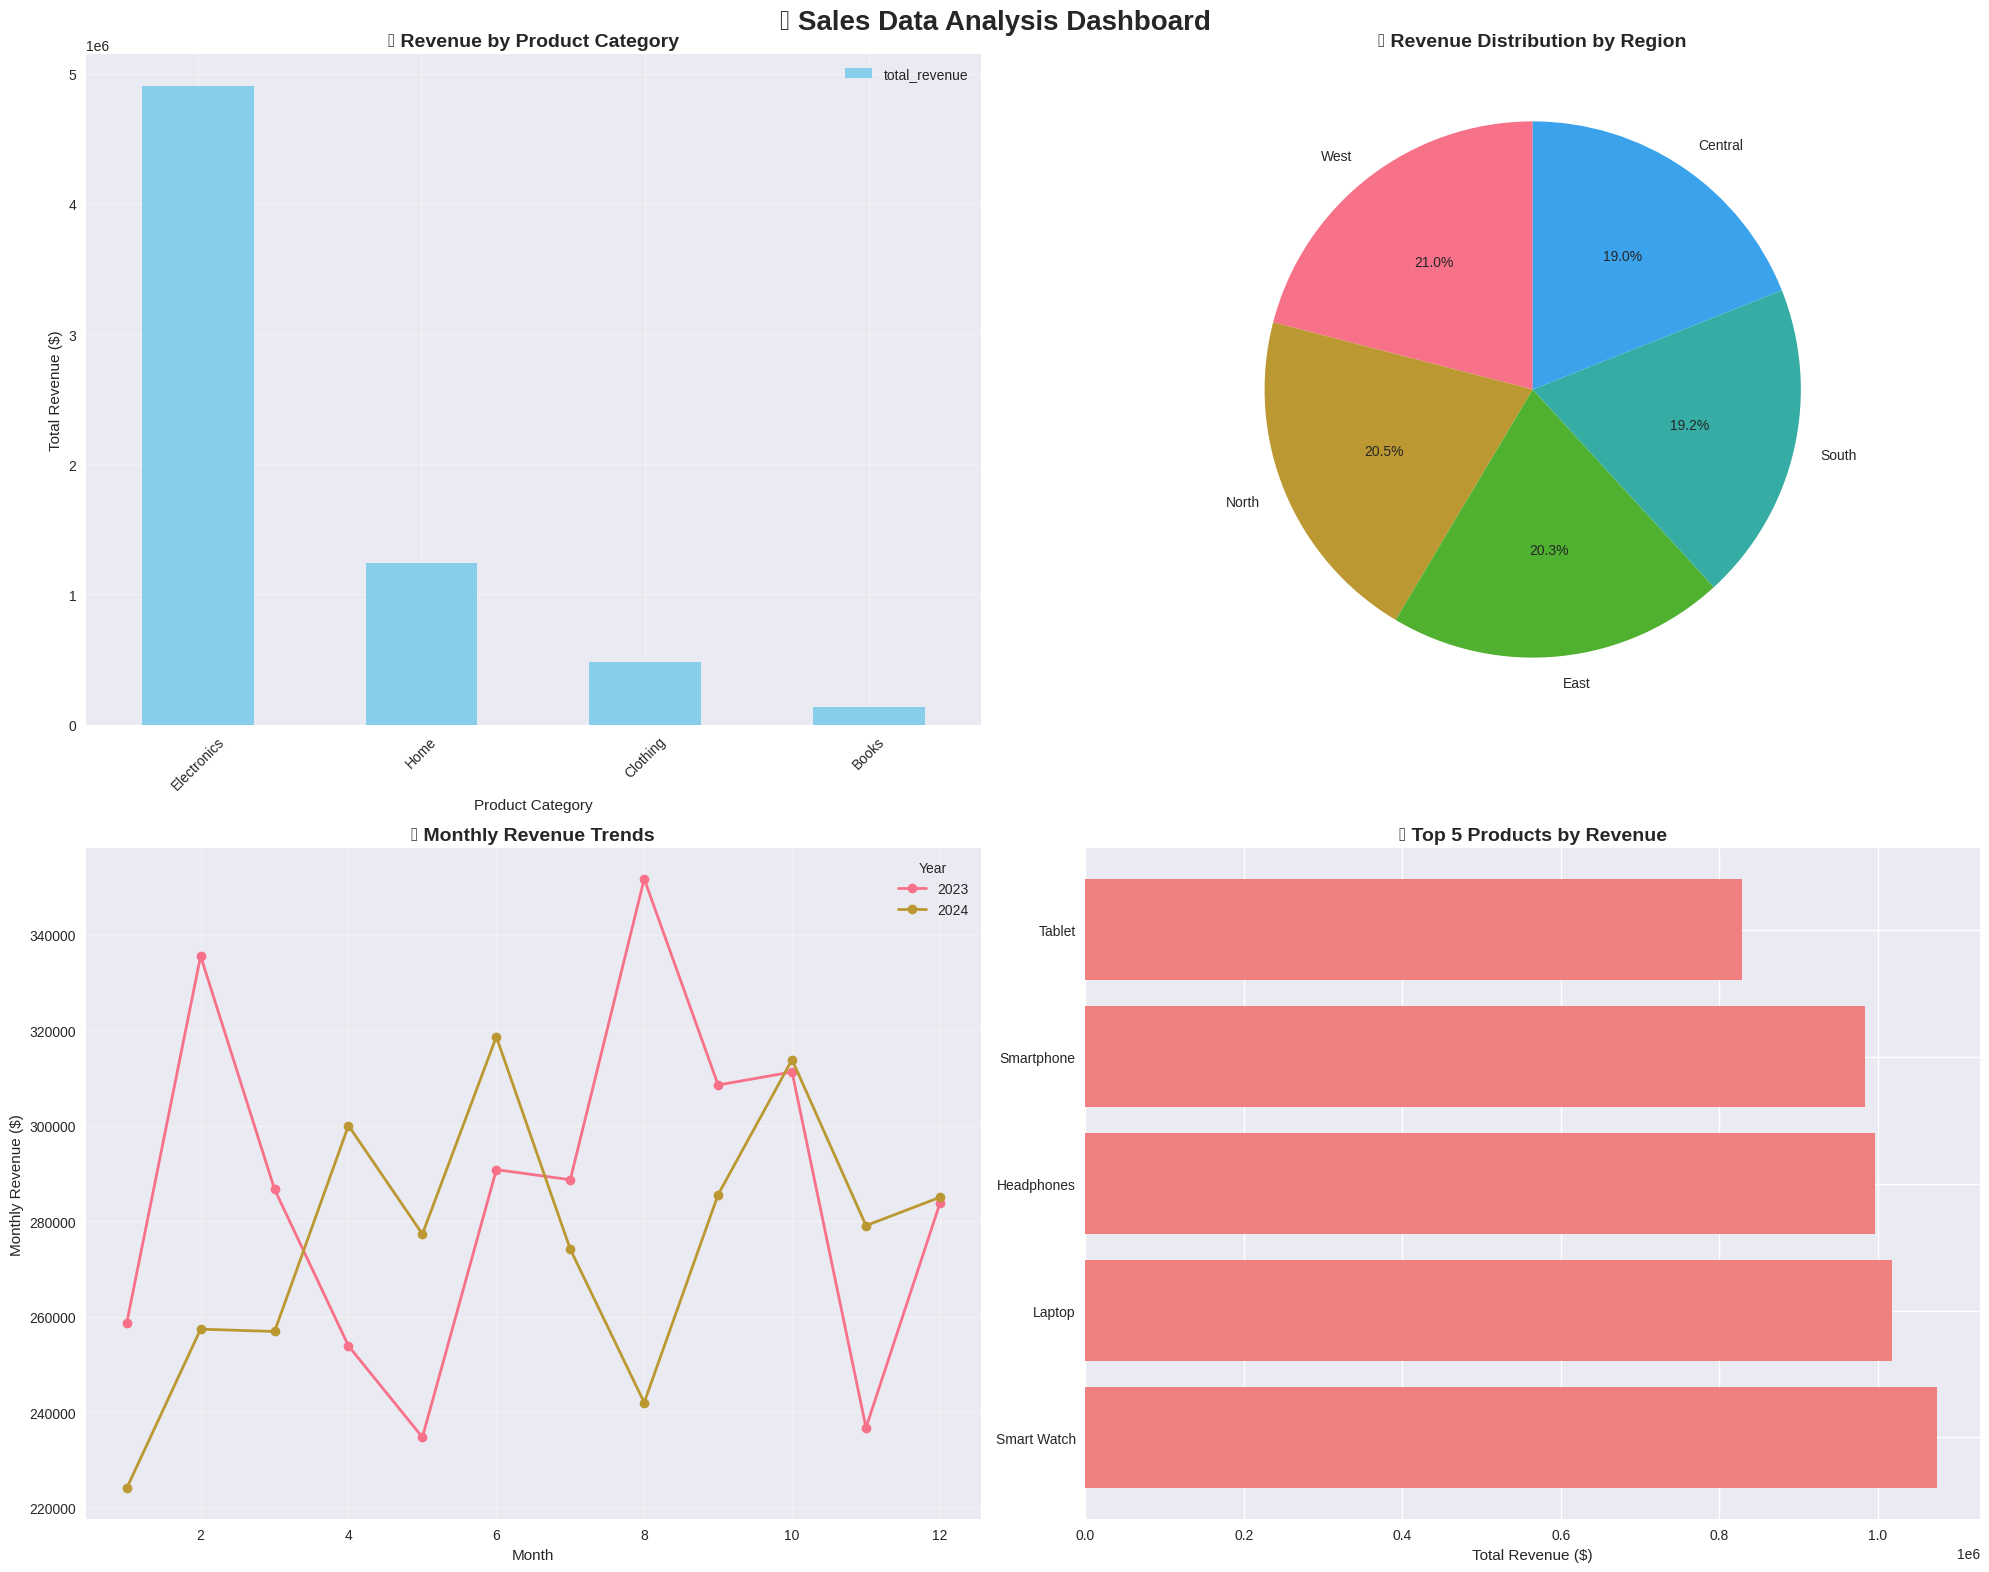


📊 Additional Visualizations:


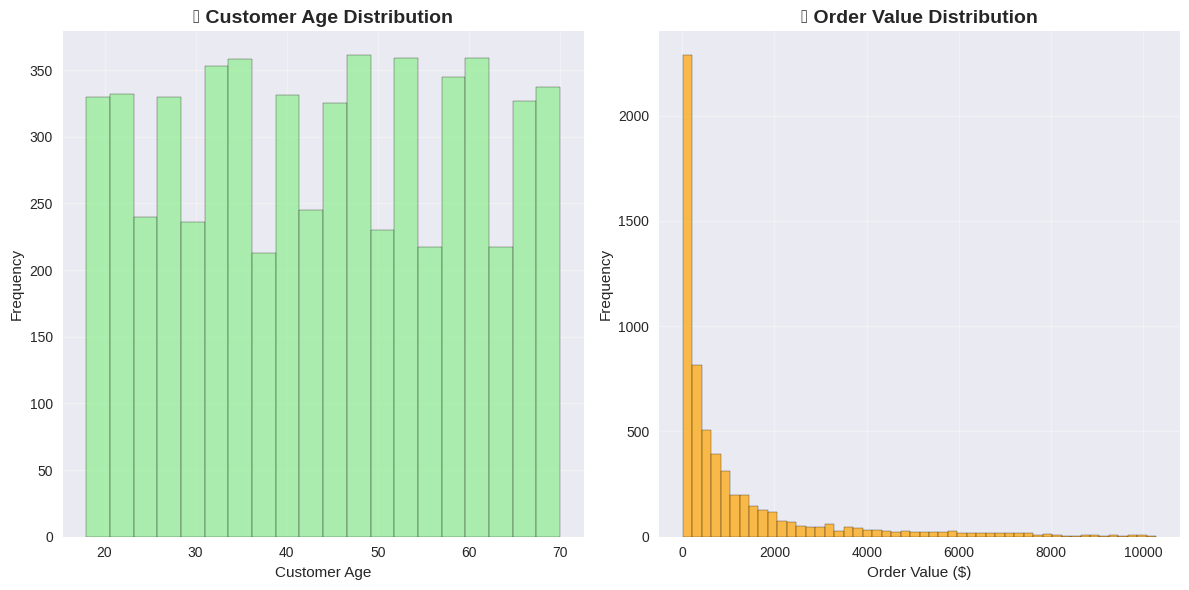

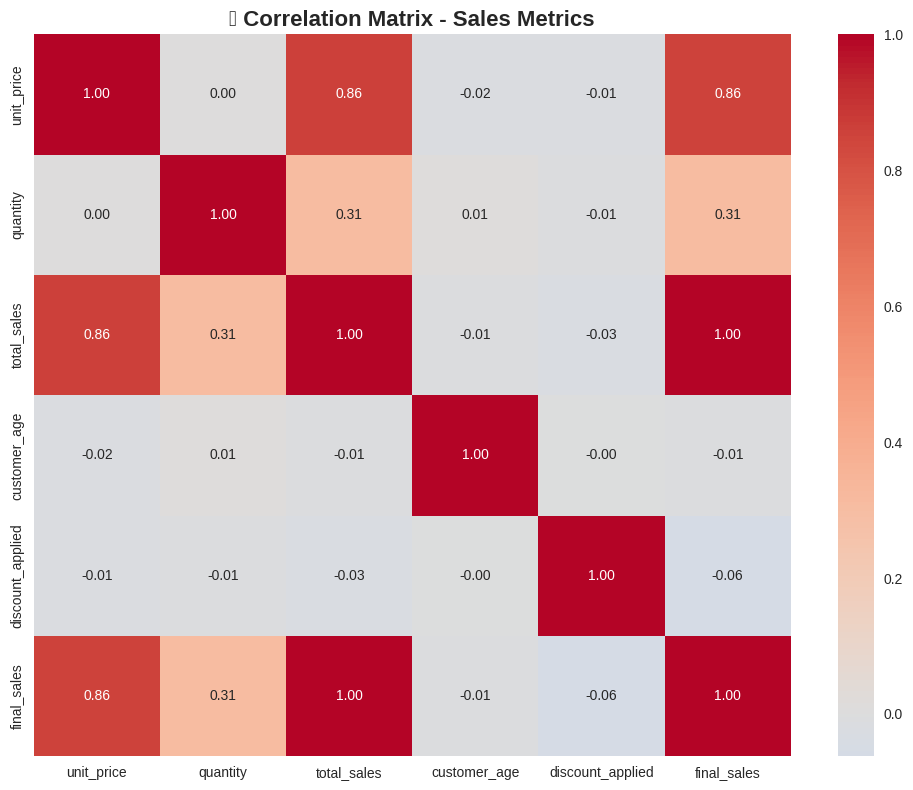

In [ ]:
# ==========================================
# STEP 6: DATA VISUALIZATIONS
# ==========================================

print("\n📊 STEP 6: Creating Data Visualizations")
print("-" * 40)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('📊 Sales Data Analysis Dashboard', fontsize=20, fontweight='bold')

# 1. Revenue by Category (Bar Chart)
ax1 = axes[0, 0]
revenue_by_category.plot(x='category', y='total_revenue', kind='bar', ax=ax1, color='skyblue')
ax1.set_title('💰 Revenue by Product Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Revenue ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. Regional Performance (Pie Chart)
ax2 = axes[0, 1]
regional_revenue = regional_performance.set_index('region')['total_revenue']
ax2.pie(regional_revenue.values, labels=regional_revenue.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('🌍 Revenue Distribution by Region', fontsize=14, fontweight='bold')

# 3. Monthly Trends (Line Chart)
ax3 = axes[1, 0]
monthly_pivot = monthly_trends.pivot(index='month', columns='year', values='monthly_revenue')
monthly_pivot.plot(kind='line', ax=ax3, marker='o', linewidth=2)
ax3.set_title('📈 Monthly Revenue Trends', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('Monthly Revenue ($)')
ax3.legend(title='Year')
ax3.grid(True, alpha=0.3)

# 4. Top Products (Horizontal Bar Chart)
ax4 = axes[1, 1]
top_5_products = top_products.head(5)
ax4.barh(top_5_products['product_name'], top_5_products['total_revenue'], color='lightcoral')
ax4.set_title('🏆 Top 5 Products by Revenue', fontsize=14, fontweight='bold')
ax4.set_xlabel('Total Revenue ($)')

plt.tight_layout()
plt.show()

# Additional visualizations
print("\n📊 Additional Visualizations:")

# Customer age distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['customer_age'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('👥 Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Order value distribution
plt.subplot(1, 2, 2)
plt.hist(df['final_sales'], bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('💵 Order Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_columns = ['unit_price', 'quantity', 'total_sales', 'customer_age', 'discount_applied', 'final_sales']
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('🔥 Correlation Matrix - Sales Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# STEP 7: KEY INSIGHTS AND SUMMARY
# ==========================================

print("\n📋 STEP 7: Key Business Insights & Summary")
print("-" * 40)

# Calculate key metrics
total_revenue = df['final_sales'].sum()
total_orders = len(df)
avg_order_value = df['final_sales'].mean()
total_customers = df['customer_age'].count()  # Assuming each row is a unique customer interaction

print("🎯 KEY BUSINESS INSIGHTS:")
print("=" * 50)

print(f"💰 Total Revenue Generated: ${total_revenue:,.2f}")
print(f"📦 Total Orders Processed: {total_orders:,}")
print(f"💵 Average Order Value: ${avg_order_value:.2f}")
print(f"👥 Total Customer Interactions: {total_customers:,}")

print("\n🏆 TOP PERFORMERS:")
print("-" * 20)
print(f"🥇 Best Category: {revenue_by_category.iloc[0]['category']} (${revenue_by_category.iloc[0]['total_revenue']:,.2f})")
print(f"🥇 Best Region: {regional_performance.iloc[0]['region']} (${regional_performance.iloc[0]['total_revenue']:,.2f})")
print(f"🥇 Best Product: {top_products.iloc[0]['product_name']} (${top_products.iloc[0]['total_revenue']:,.2f})")

# Best performing month
best_month = monthly_trends.loc[monthly_trends['monthly_revenue'].idxmax()]
# Ensure month and year are integers
month_int = int(best_month['month'])
year_int = int(best_month['year'])
print(f"🥇 Best Month: {int(best_month['year'])}-{int(best_month['month']):02d} (${best_month['monthly_revenue']:,.2f})")


print("\n📊 ANALYSIS SUMMARY:")
print("-" * 20)
print("✅ Successfully loaded 6,000+ sales records from CSV")
print("✅ Created and queried SQLite database with complex SQL")
print("✅ Performed comprehensive data analysis with Pandas")
print("✅ Generated insightful visualizations and business intelligence")
print("✅ Identified top products, regions, and customer segments")
print("✅ Analyzed seasonal trends and discount impact")

print("\n🔧 TECHNICAL SKILLS DEMONSTRATED:")
print("-" * 30)
print("• SQLite3 database operations and complex SQL queries")
print("• Pandas data manipulation and advanced aggregations")
print("• Data cleaning and preprocessing techniques")
print("• Statistical analysis and business intelligence")
print("• Data visualization with Matplotlib and Seaborn")
print("• Business insight generation and reporting")

print("\n🚀 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 50)

# Close database connection
conn.close()
print("💾 Database connection closed.")


📋 STEP 7: Key Business Insights & Summary
----------------------------------------
🎯 KEY BUSINESS INSIGHTS:
💰 Total Revenue Generated: $6,755,782.35
📦 Total Orders Processed: 6,045
💵 Average Order Value: $1117.58
👥 Total Customer Interactions: 6,045

🏆 TOP PERFORMERS:
--------------------
🥇 Best Category: Electronics ($4,903,598.90)
🥇 Best Region: West ($1,416,643.75)
🥇 Best Product: Smart Watch ($1,075,409.90)
🥇 Best Month: 2023-08 ($351,734.65)

📊 ANALYSIS SUMMARY:
--------------------
✅ Successfully loaded 6,000+ sales records from CSV
✅ Created and queried SQLite database with complex SQL
✅ Performed comprehensive data analysis with Pandas
✅ Generated insightful visualizations and business intelligence
✅ Identified top products, regions, and customer segments
✅ Analyzed seasonal trends and discount impact

🔧 TECHNICAL SKILLS DEMONSTRATED:
------------------------------
• SQLite3 database operations and complex SQL queries
• Pandas data manipulation and advanced aggregations
• Data